# Task 1

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import math
from utils import Utils

In [10]:
def canny(src: np.ndarray, low_threshold: float, high_filter: float, sigma: float) -> np.ndarray:
    # Gauss filter
    return gaussian_blur(src, kernel_size=5, sigma=sigma)

    # Sobel filtering
    # NMS
    # Hysterisys thresholding (uses thresholds)
    

def convolve(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    'Computes the convolution of an image with a kernel, with clamp-to-edge.'
    outImage = image.copy()
    iDimensions = image.shape

    for iRow in range(iDimensions[0]):
        for iCol in range(iDimensions[1]): 
            accumulator = 0.0
            kDimensions = kernel.shape
            
            for kRow in range(kDimensions[0]):
                for kCol in range(kDimensions[1]):
                    relativeRow = iRow + kRow - (kDimensions[0] // 2)
                    relativeCol = iCol + kCol - (kDimensions[1] // 2)

                    # Clamping
                    relativeRow = max(0, min(relativeRow, iDimensions[0] - 1))
                    relativeCol = max(0, min(relativeCol, iDimensions[1] - 1))

                    accumulator += image[relativeRow, relativeCol] * kernel[kDimensions[0] - kRow - 1, kDimensions[1] - kCol - 1]
            
            outImage[iRow, iCol] = accumulator

    return outImage

def gaussian_blur(src:np.ndarray, kernel_size: int, sigma: float) -> np.ndarray:
    kernel = gauss_kernel(sigma, kernel_size)
    return convolve(src, kernel)

def gauss_kernel(variance: float, size: int):
    if (size % 2 == 0):
        raise Exception("size must be odd")

    gauss = np.zeros([size, size])
    for row in range(gauss.shape[0]):
        x = row - gauss.shape[0] // 2
        for col in range(gauss.shape[1]):
            y = col - gauss.shape[1] // 2
            gauss[row, col] = np.exp(-(x * x +  y * y) / (2.0 * variance)) / (2.0 * np.pi * variance)
    gauss /= gauss.sum()
    
    return gauss

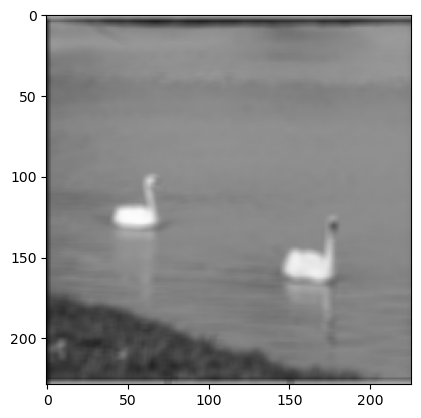

In [11]:
# Testing out function

img = cv2.imread("ducks_small.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img = canny(img, 0, 0, 50)
plt.imshow(img)
plt.show()

## How to task1 <br>
1. Preprocess: turn image to grayscale
2. Edge detection (Canny) <b>NOT</b> using inbuilt function
3. Line detection (Hough) <b>NOT</b> using inbuilf function
4. We get the 2 equations of the lines in 2d space
5. calculate angles


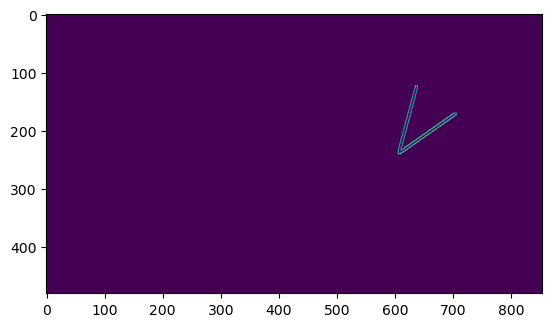

theta: 40.0 -- correct_answer: 40 -- PASS


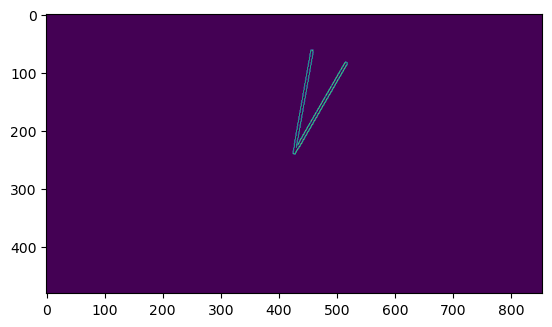

theta: 20.0 -- correct_answer: 20 -- PASS


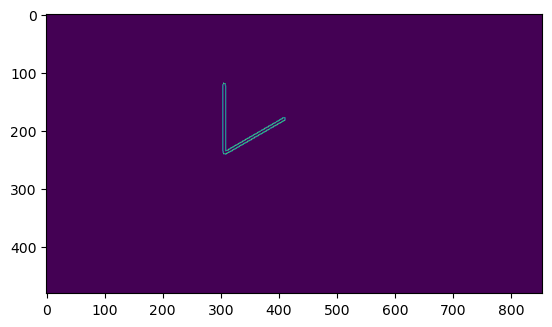

theta: 60.0 -- correct_answer: 60 -- PASS


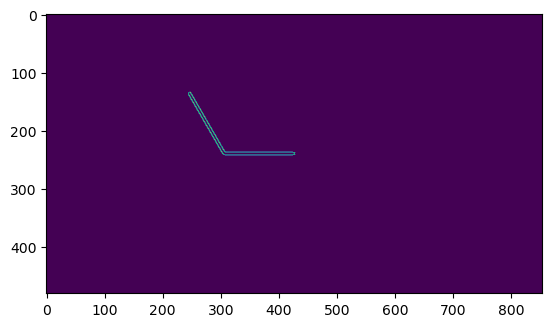

theta: 120.0 -- correct_answer: 120 -- PASS


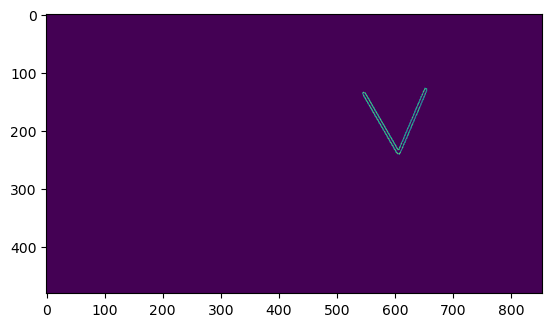

theta: 0.0 -- correct_answer: 53 -- FAIL


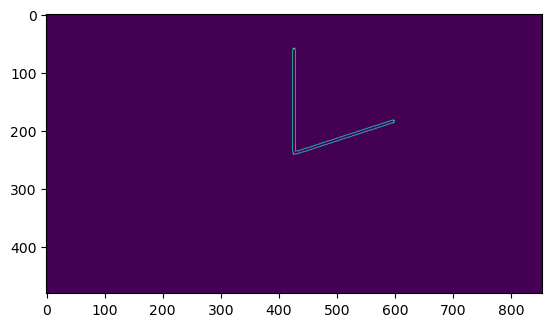

theta: 0.0 -- correct_answer: 72 -- FAIL


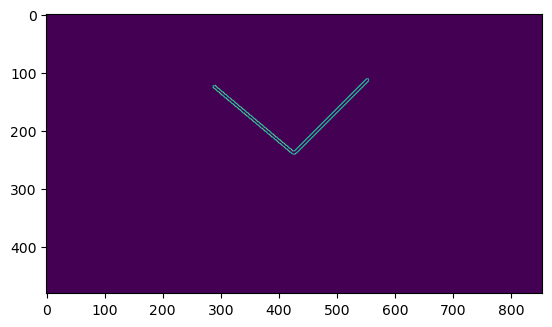

theta: 95.0 -- correct_answer: 95 -- PASS


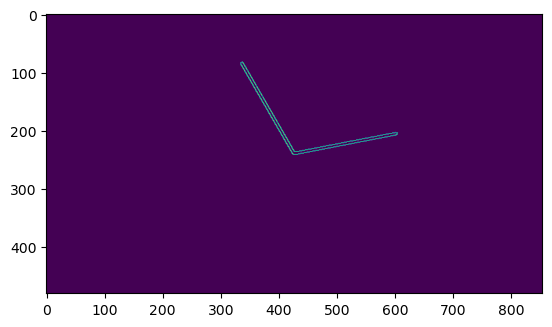

theta: 0.0 -- correct_answer: 109 -- FAIL


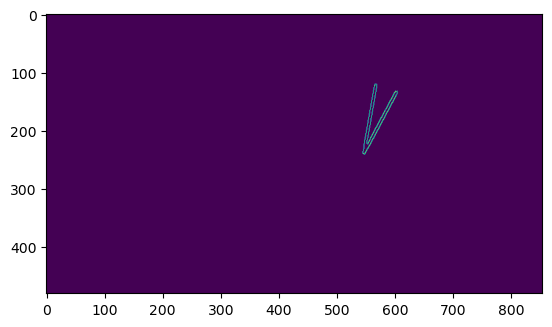

Skipping image9.png - need at least 2 lines


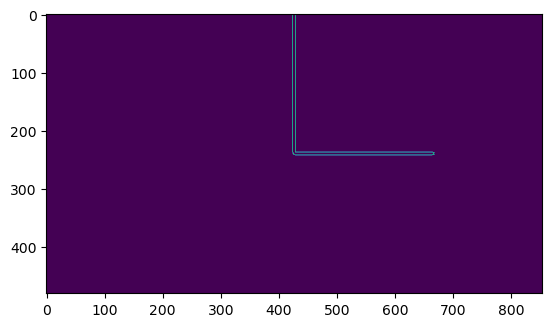

theta: 90.0 -- correct_answer: 90 -- PASS


In [2]:
folderName = "Task1Dataset"
dataset = pd.read_csv(folderName + "\list.txt")

# Empirically chosen thresholds for canny edge detection
lower_threshold = 0.2 * 255
upper_threshold = lower_threshold * 1.5

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"{folderName}\\{filename}")

    # Convert to grayscale but store as colour image to keep opencv happy
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #gray_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
    gray_img = cv2.GaussianBlur(gray_img, (25,25), 2)
    
    # Detect edges with Canny edge detection
    img_edges = cv2.Canny(gray_img, 70, 110)
    plt.imshow(img_edges)
    plt.show()

    hough_lines = cv2.HoughLines(img_edges, rho=1, theta=np.deg2rad(5), threshold=90, lines=None, srn=0, stn=0)

    line_angles = []
    for line in hough_lines:
        (rho, theta) = (line[0][0], line[0][1])
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping {filename} - need at least 2 lines")
        continue
    
    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    pass_fail_string = "PASS" if angle_between_lines == correct_answer else "FAIL"
    print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

    # plt.imshow(img_edges)
    # plt.show()

In [3]:
dataset

,FileName,AngleInDegrees
0,image1.png,40
1,image2.png,20
2,image3.png,60
3,image4.png,120
4,image5.png,53
5,image6.png,72
6,image7.png,95
7,image8.png,109
8,image9.png,18
9,image10.png,90


## What to ask <br>
1. Do we need to implement grayscale? No
2. Is Guassian Blur necessary?
3. How to de find good parameters?
4. What are good parameters?
5. We have to implement Canny and Hough, right?

loading and graycale functions are ok
gaussian blur and convolution are not ok